### RDKit's capabilities at handling 3D molecules and 2D representations  

In [1]:
from rdkit.Chem import Descriptors
from rdkit import Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Descriptors 
from rdkit.Chem import AllChem 
from rdkit import DataStructs
import numpy as np 
from rdkit.Chem import MolFromInchi
from rdkit.Chem import rdMolDescriptors
import pubchempy
from rdkit.Chem import AddHs

#### Processing Molecule Graphs 
Given a SMILES String(canonical or noncanonical), RDKit can process the bonding information to get all atoms and the edges between the atoms. This is used at processing molecule datasets to get graph information  
  
- Index the atoms as vertices in the graph, so we can access and retrieve the different node information   
  
- The bonds between atoms are represented as edges 

In [21]:
# RDKit automatially assigns the index to each atom 
mol= Chem.MolFromSmiles("c1ccccc1") # benzene C6H6 
for atom in mol.GetAtoms(): 
    print(f"Atom:{atom.GetIdx()} | Symbol:{atom.GetSymbol()} | H Bonds:{atom.GetTotalNumHs()}")

Atom:0 | Symbol:C | H Bonds:1
Atom:1 | Symbol:C | H Bonds:1
Atom:2 | Symbol:C | H Bonds:1
Atom:3 | Symbol:C | H Bonds:1
Atom:4 | Symbol:C | H Bonds:1
Atom:5 | Symbol:C | H Bonds:1


0 C - 1 C
1 C - 2 C
2 C - 3 C
3 C - 4 C
4 C - 5 C
5 C - 0 C


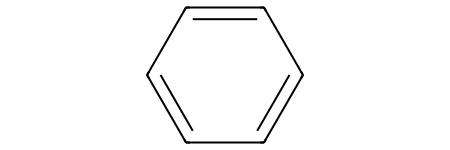

In [ ]:
# print out the edges of each vertex 
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(), mol.GetAtomWithIdx(bond.GetBeginAtomIdx()).GetSymbol(), "-", bond.GetEndAtomIdx(), mol.GetAtomWithIdx(bond.GetEndAtomIdx()).GetSymbol())
mol 

In [49]:
# more complex examples
mol= Chem.MolFromSmiles("C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1") 
for atom in mol.GetAtoms(): 
    print(f"Atom:{atom.GetIdx()} | Symbol:{atom.GetSymbol()}")

Atom:0 | Symbol:C
Atom:1 | Symbol:C
Atom:2 | Symbol:C
Atom:3 | Symbol:C
Atom:4 | Symbol:N
Atom:5 | Symbol:C
Atom:6 | Symbol:C
Atom:7 | Symbol:N
Atom:8 | Symbol:C
Atom:9 | Symbol:C
Atom:10 | Symbol:C
Atom:11 | Symbol:N
Atom:12 | Symbol:N
Atom:13 | Symbol:C
Atom:14 | Symbol:N
Atom:15 | Symbol:C
Atom:16 | Symbol:C
Atom:17 | Symbol:C
Atom:18 | Symbol:C
Atom:19 | Symbol:C
Atom:20 | Symbol:C


0 C - 1 C
1 C - 2 C
2 C - 3 C
3 C - 4 N
4 N - 5 C
5 C - 6 C
6 C - 7 N
7 N - 8 C
8 C - 9 C
9 C - 10 C
10 C - 11 N
11 N - 12 N
12 N - 13 C
13 C - 14 N
14 N - 15 C
9 C - 16 C
3 C - 17 C
17 C - 18 C
18 C - 19 C
18 C - 20 C
20 C - 1 C
16 C - 5 C
14 N - 10 C


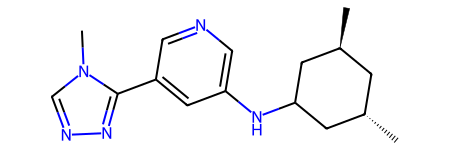

In [ ]:
# if an atom has more than 1 bonds, this also shows. 
for bond in mol.GetBonds(): 
    print(bond.GetBeginAtomIdx(), mol.GetAtomWithIdx(bond.GetBeginAtomIdx()).GetSymbol(), "-", bond.GetEndAtomIdx(), mol.GetAtomWithIdx(bond.GetEndAtomIdx()).GetSymbol())
mol 

#### Converting into graph form 
- With the atom indices and edges, RDKit is used to construct vertices and edge_index tables for datasets where Graph Neural Networks like Graph Convolution Network can be trained on (i.e. do convolution on). 

### Incomplete Graph Representations 

- As non-isomeric SMILES strings don't explicitly show hydrogen bonds, the graph representations of a molecule also **does not include hydrogen bonds**, so we will not have hydrogen atoms as vertices and the edges from vertices connecting to hydrogen atoms. 
  - Datasets built using PyTorch Geometric do not contain H bonds either 
  
- Because of how RDKit retrieves graph information, it needs SMILES strings input to make a molecule to turn into a graph, so the **same limitations on SMILES strings carry over to graphs** 

### Adding Hydrogen Bonding Information 
- Chem.AddHs explicitly show the hydrogen atoms and hydrogen bondings as atoms and edges 

H added: [H]c1nc([H])c(N([H])C2([H])C([H])([H])[C@@]([H])(C([H])([H])[H])C([H])([H])[C@]([H])(C([H])([H])[H])C2([H])[H])c([H])c1-c1nnc([H])n1C([H])([H])[H]
Original: C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1


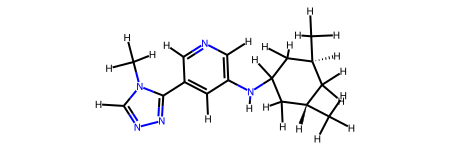

In [53]:
mol= AddHs(mol)
smiles= Chem.MolToSmiles(mol)
print("H added:",smiles)
smiles= Chem.MolToSmiles(Chem.MolFromSmiles("C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1"))
print("Original:",smiles)
mol 

In [55]:
# updated # of atoms 
print(mol.GetNumAtoms())    # generated 23 extra atoms (Hs) 
for bond in mol.GetBonds(): 
    print(bond.GetBeginAtomIdx(), mol.GetAtomWithIdx(bond.GetBeginAtomIdx()).GetSymbol(), "-", bond.GetEndAtomIdx(), mol.GetAtomWithIdx(bond.GetEndAtomIdx()).GetSymbol())

44
0 C - 1 C
1 C - 2 C
2 C - 3 C
3 C - 4 N
4 N - 5 C
5 C - 6 C
6 C - 7 N
7 N - 8 C
8 C - 9 C
9 C - 10 C
10 C - 11 N
11 N - 12 N
12 N - 13 C
13 C - 14 N
14 N - 15 C
9 C - 16 C
3 C - 17 C
17 C - 18 C
18 C - 19 C
18 C - 20 C
20 C - 1 C
16 C - 5 C
14 N - 10 C
0 C - 21 H
0 C - 22 H
0 C - 23 H
1 C - 24 H
2 C - 25 H
2 C - 26 H
3 C - 27 H
4 N - 28 H
6 C - 29 H
8 C - 30 H
13 C - 31 H
15 C - 32 H
15 C - 33 H
15 C - 34 H
16 C - 35 H
17 C - 36 H
17 C - 37 H
18 C - 38 H
19 C - 39 H
19 C - 40 H
19 C - 41 H
20 C - 42 H
20 C - 43 H


### Test the 2D and 3D representation of molecules in RDKit 

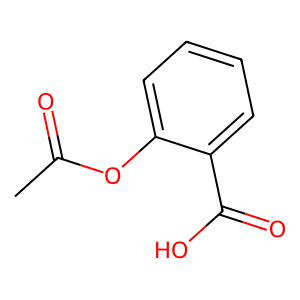

In [17]:
smiles= "CC(=O)OC1=CC=CC=C1C(=O)O"  # 1D information 
mol= Chem.MolFromSmiles(smiles)
img= Draw.MolToImage(mol)   # 2D picture 
img

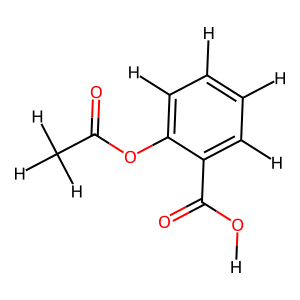

In [18]:
mol= Chem.AddHs(mol)
img= Draw.MolToImage(mol)
img

#### Generate Conformers 
RDKit has built-in functions at generating conformers of molecules. Conformers are variants of a molecule with different spatial information and energy levels with the same chemical formula (and SMILES representations). 

- RDKit can use a more modern and stable approach called ETKDG method to generate conformers and have multiple optimizer methods to optimize the generated conformer.   
  

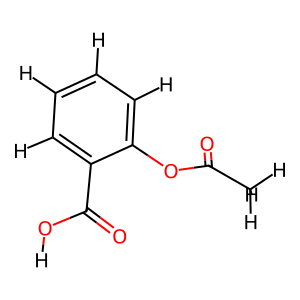

In [43]:
# We can run the function multiple times to get different conformer output
mol= Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, AllChem.ETKDG()) 
AllChem.UFFOptimizeMolecule(mol)
img= Draw.MolToImage(mol)
img

### Visualizing 3D Graphs 
- RDKit doesn't support drawing 3D graphs directly. We get this with external libraries 

In [32]:
import py3Dmol
def visualize_molecule(mol):
    """Convert RDKit mol to a 3D visualization using py3Dmol"""
    mol_block = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=200, height=200)
    viewer.addModel(mol_block, "mol")
    viewer.setStyle({"stick": {}})

    return viewer.show()
visualize_molecule (mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Extracting information from 2D and 3D graphs 
- RDKit can extract basic information such **atomic number, Hybridization state, formal charge, aromaticity**    
  
- Other 2D informations include bonds, such as **bond type, bond length, bond angle**. Because of the geometric information we can compute more information combining with functions in RDKit 
  
- Extracting 3D information requires us to turn the mol into a 3D conformer, then we can use the functions on the conformer. On information such as xyz coordinate

In [34]:
for atom in mol.GetAtoms(): 
    print(f"Atom:{atom.GetSymbol()} | Atomic Number: {atom.GetAtomicNum()}  | Formal Charge: {atom.GetFormalCharge()}")

Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:O | Atomic Number: 8  | Formal Charge: 0
Atom:O | Atomic Number: 8  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:C | Atomic Number: 6  | Formal Charge: 0
Atom:O | Atomic Number: 8  | Formal Charge: 0
Atom:O | Atomic Number: 8  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0
Atom:H | Atomic Number: 1  | Formal Charge: 0


Extract the 3D coordinate of each atom in the conformer 

In [ ]:
# each time we get a different conformer, the atomic position changes as well 
conf= mol.GetConformer()    # retreive the conformer 
coord =[] 
for atom in mol.GetAtoms(): 
    pos= conf.GetAtomPosition(atom.GetIdx())
    print(f"Atom:{atom.GetSymbol()} | x:{pos.x:.3f} | y:{pos.y:.3f} | z:{pos.z:.3f}")


Atom:C | x:3.551 | y:-1.042 | z:-0.333
Atom:C | x:2.297 | y:-0.322 | z:-0.694
Atom:O | x:2.248 | y:0.341 | z:-1.766
Atom:O | x:1.159 | y:-0.486 | z:0.107
Atom:C | x:-0.005 | y:0.297 | z:0.035
Atom:C | x:0.062 | y:1.659 | z:-0.321
Atom:C | x:-1.095 | y:2.436 | z:-0.378
Atom:C | x:-2.331 | y:1.872 | z:-0.071
Atom:C | x:-2.414 | y:0.529 | z:0.303
Atom:C | x:-1.259 | y:-0.274 | z:0.367
Atom:C | x:-1.394 | y:-1.698 | z:0.771
Atom:O | x:-0.389 | y:-2.457 | z:0.818
Atom:O | x:-2.645 | y:-2.214 | z:1.103
Atom:H | x:3.571 | y:-2.029 | z:-0.840
Atom:H | x:4.436 | y:-0.449 | z:-0.647
Atom:H | x:3.595 | y:-1.195 | z:0.766
Atom:H | x:1.013 | y:2.132 | z:-0.527
Atom:H | x:-1.032 | y:3.481 | z:-0.652
Atom:H | x:-3.227 | y:2.477 | z:-0.115
Atom:H | x:-3.388 | y:0.121 | z:0.542
Atom:H | x:-2.752 | y:-3.182 | z:1.380
